***Predicting job categories for people in the tech industry to transition to based on their current career field, hard skills and career level.***

This Notebook contains a basic model for predicting job categories based on skills and career level. Here is the basic structure of the code to help guide the user through the different stages of Machine Learning... enjoy! 

- Stage 1, Pre-processing (Exploration, Cleaning, Formatting, Visualisation, Missing Values, Normalisation)
- Stage 2, Training (Defining Target Variables and Input Values(X and Y), Splitting Training and Testing Samples, Training on Different Algorithms)
- Stage 3, Testing and Evaluation (Model Accuracy, Confusion Matrix)
- Stage 4, Optimisation (Feature Engineering, OverSampling, Hyperparemeter Tuning)
- Stage 5, Saving and Loading (Model Completion, Packaging)

This strucure is LOOSE as we will implement stages 3 and 4 within the earlier stages after we have tested our models accuracy. 

**Stage 1 - Exploration**

In [2059]:
#importing library
import pandas as pd 
#importing dataset
df = pd.read_csv('main_dataset_cleaned (main dataset).csv')
#first dataframe
df = df

Importing pandas and the dataset into a dataframe so we can manipulate the data.

In [2060]:
#exploring at raw dataframe
print(df)

    career_level                                        hard_skills  \
0         junior                                                NaN   
1         junior                                                NaN   
2         junior  chef, provisioning, bash, python, ruby, config...   
3         junior  chef, provisioning, bash, python, ruby, config...   
4         junior             windows, linux, .net,dotnet,dotnetcore   
..           ...                                                ...   
262       junior                                                NaN   
263       junior  javascript, integration, javascript|js|es6|ecm...   
264       senior                     php, bash, linux, python, ruby   
265       junior                                                NaN   
266       junior  javascript, javascript|js|es6|ecmascript|ecmas...   

                                 title  
0               Data Centre Technician  
1         Digital Marketing Consultant  
2          Platform Engi

In [2061]:
#Exploring the data types
df.dtypes

career_level    object
hard_skills     object
title           object
dtype: object

In [2062]:
#total rows and collumns
df.shape

(267, 3)

In [2063]:
#basic statistics
df.describe()

,career_level,hard_skills,title
count,267,155,267
unique,4,120,224
top,junior,agile,Project Manager
freq,202,14,6


Exploring the different columns, how many samples and features there are, and seeing what datatypes the current features are. Allowing us to understand the data and what needs to be changed. 

**Stage 1 - Missing Values**

In [2064]:
#finding null values
df.isnull().sum()

career_level      0
hard_skills     112
title             0
dtype: int64

Identifying the NaN or Null samples in our dataframe. This data seems to have 112 samples of hard_skills with Null Values.

In [2065]:
#reveiling rows with null values
torf = df.isnull().any(axis=1)

In [2066]:
#looking at the null values in the first 5 collumns
torf.head()

0     True
1     True
2    False
3    False
4    False
dtype: bool

torf = True or False. This is changing our samples in hard_skills to a boolean datatype to better understand where the Null samples are. The head is the first 5 samples in the hard_Skills feature and the first two have returned true, meaning they are missing or blank values. 

**Stage 1 - Formatting**

In [2067]:
#defining groups for all values
wordlist ={
    "digital_roles": [
		{"keyword":"developer",
   		"titles": [
					"Senior Developer",
					"Junior and Mid-Weight Developers",
					"Front End Web Developer",
					"Full Stack PHP Developer",
					"Graduate Web Developer",
					"Junior .NET Developer",
					"Experience .NET Developer",
					"Lead Developer",
					"Developer in Test",
					"Developer",
					"Java Developer",
					"Developer/Data Analyst",
					"Python/Scrapy Senior Developer",
					"Front End Developer",
					"Ruby on Rails Developer",
					"React/React native Front End Developer",
					"Full Stack Developer",
					"PHP Software Developer",
					"Mobile Developer",
					"Developers",
					"Web Developer",
					"PHP Developer",
					"Senior Business Intelligence Developer",
					".NET Developer",
					"PHP Developer",
					"BI Developer",
					"Front End Developer",
					"Android Developer",
					"WordPress Developer",
					"Magento Developer",
					"PHP Developer",
					"Back End Web Developer",
					"Front End Web Developer",
					"Senior Java Developer",
					"React native iOS/Android Mobile Developer",
					"Full Stack JavaScript Developer",
					"PHP Developer",
					"Data-literate Software Developer (Golang/Python)",
					"Senior Developer",
					"iOS Developer",
					"WordPress Developer",
					"Senior PHP Software Developer",
					"Front-end Developer",
					"Senior Back-end .NET Developer",
					"Java Developers – Multiple Vacancies",
					"Website Developer",
					"Software Developer in Test (SDET)",
					"Senior .NET Developer",
					"Graduate Developer",
					"Graduate/na Software Developer",
					"Magento Developer",
					"WordPress Developer",
					"Developer",
					"JS Developer",
					"Mid Weight Backend Developer",
					"Full Stack Developer",
					"Senior Magento Software Developer",
					"Drupal Developer",
					"Senior Technical Developer (web-based tools) Leeds",
					".NET Developer",
					"Front End Developer",
					"Javascript Developer",
					"Front End Developer – JavaScript",
					"Junior and Mid-Weight Web Developers",
					"Senior Web Developer",
					"Senior Creative Full Stack Developer",
					"Java Developer",
					".NET Developer",
					"Graduate Developer",
					"Lead SDET/Lead Software Developer in Test",
					"Full Stack Mid/Senior PHP Web Developer",
					"Front End Web Designer/Developer"
		]},
        {"keyword": "technician",
     "titles": [
         "Data Centre Technician",
         "2nd Line Technical Operations Technician",
         "Support Technician",
         "Database Administrator",
         "Validation Technician",
         "Technician – Client Service Desk",
         "Technical Systems Administrator",
         "IT Support Technician",
         "1st/2nd Line Helpdesk Support Engineer",
     ]},
    {"keyword": "marketing",
     "titles": [
         "Digital Marketing Consultant",
         "Digital Marketing Executive",
         "Digital Marketing Executive/Consultant",
         "PPC Experts",
         "Digital Marketing Executive",
         "Online Content and PR Executive",
         "SEO Executive",
         "SEO Strategist",
         "PPC Analyst",
         "PR and Social Account Managers",
         "Digital Account Executive",
         "Associate Director SEO",
         "SEO Strategist",
         "SEO Executive",
         "SEO Lead",
         "SEO Manager",
         "Community Engagement Manager",
         "PPC Executive",
         "Senior SEO Strategist",
         "SEO Executive",
         "SEO Lead",
         "SEO Manager",
         "Senior SEO Consultant",
         "Digital Account Manager",
         "Digital Project Manger",
         "SEO Executive",
         "SEO Lead",
         "SEO Manager",
         "Digital Threat Researcher",
         "Content Marketing Co-ordinator",
         "Technology Specialist – Data Project Management",
         "Marketing Executive",
         "New Business Development Executive",
         "Marketing Executive (Social Media and Events) Fixed Term Contract",
     ]},
    {"keyword": "technical",
     "titles": [
         "Unity Technical Artist",
         "1st Line Technical Support",
         "Platform Engineer – Windows",
         "Platform Engineer – Linux and AWS",
         "Graduate Tech Operations Engineer",
         "Technical Architect",
         "Development Operations Engineer",
         "IT Apprenticeship",
         "Development Architect/Engineer",
         "Senior Google Cloud Platform Engineer",
         "Junior .NET Developer",
         "Experience .NET Developer",
         "Internship",
         "IT Cyber Security – UNIX Technical Specialist",
         "2nd Line Support/Service Desk Engineer",
         "Technical Trainer (Software Development and Testing)",
         "Associate Director SEO",
         "Technical Project Manager",
         "Second Line Technical Support",
         "Senior Technical Developer (web-based tools) Leeds",
         "Technology Consultant (IT Strategy)",
         "Technology Consultant (Data Strategist)",
         "Cloud Consultant",
         "Technical SEO Specialist",
         "Technology Specialist – Data Project Management",
         "Head of Issue and Crisis Monitoring (Social Media)",
         "Tech Lead – Enterprise Services Tribe",
         "Tech Lead (native)",
         "Manager, IT Service Continuity",
     ]},
    {"keyword": "managerial",
    	"titles": [
					"UX and CRO Executive"
					"Lead Interaction Designer – Gaming Tribe",
					"Junior Project Manager",
					"Project Manager – Max Card",
					"Senior Account Manager",
					"Trainer and System Consultant",
					"Programmatic Display Executive",
					"PR and Social Executive",
					"Senior PHP Software Developer",
					"Technical Service Delivery Manager",
					"Account Manager",
					"Senior Digital Marketing Executive",
					"Senior Back-end .NET Developer",
					"Senior Java Developer",
					"Senior Software Engineer (Java) Trading Tribe",
					"Engineering Manager",
					"Principal Operations Engineer/Tech Lead",
					"Senior Engineer – System Build",
					"Associate Director SEO",
					"Project Planner and Facilitator",
					"Senior Magento Software Developer",
					"Senior SEO Strategist",
					"Senior Creative Full Stack Developer",
					"Head of Design",
					"Senior Agile Delivery Lead  (Gaming Tribe)",
					"Manager, IT Service Continuity",
					"Senior Content Writer",
					"Senior Engineer- Software Development",
					"Service Operations Engineer",
					"Technology Consultant (IT Strategy)",
					"Technology Consultant (Data Strategist)",
					"Cloud Consultant",
					"Technical SEO Specialist",
					"Technology Specialist – Data Project Management",
					"Head of Issue and Crisis Monitoring (Social Media)",
					"Tech Lead – Enterprise Services Tribe",
					"Tech Lead (native)",
					"Manager, IT Service Continuity",
					"Tech Lead",
					"Project Manager",
					"Senior DevOps Architect/Head of DevOps",
					"Digital Project Manager",
					"Regional Business Development Manager – Full or Part-time",
					"Test Automation Architect",
					"IT Technical Specialist",
					"Technical Programme Manager",
					"Service Lead – Data Provisioning",
					"Insight Executive – Graduate Role",
					"Social Media Geek",
					"UX Practitioners",
					"Product Owner",
					"Junior Account Executive",
					"Graduate Executives",
					"Product Marketing Adviser",
					"Account Executive",
					"Architect – Software",
					"Junior Paid Media Manager",
					"Junior Finance and Systems Administrator",
					"Mobile App Optimisation Lead",
					"Business Development Manager",
					"Scrum Master",
					"Solutions Architect",
					"Digital Content Executive",
					"UX Design Consultant"
    ]},
		{"keyword":"engineer",
   		"titles": [
               		"Platform Engineer – Windows",
					"Platform Engineer – Linux and AWS",
					"Graduate Tech Operations Engineer",
					"Development Operations Engineer",
					"Development Architect/Engineer",
					"Senior Google Cloud Platform Engineer",
					"2nd Line Support/Service Desk Engineer",
					"Senior Software Engineer",
					"Senior DevOps Engineer",
					"Lead QA Automation Engineer",
					"Engineer",
					"Junior Software Engineer",
					"Lead Software Test Engineer",
					"Software Test Engineer",
					"Software Development Engineer – API & Microservices",
					"Software Implementation Engineer",
					"Platform Engineers, Full Stack Engineers, Scrum Masters, Architects",
					"Software Engineer: Python",
					"Software Engineer: C#/.NET",
					"Software Engineer: Java",
					"Technical Operations Engineer",
					"Engineer – Database",
					"Technical Operations Engineer",
					"Hardware Engineer",
					"Senior Engineer – System Build",
					"Automation Test Engineer",
					"Senior Engineer- Software Development",
					"Service Operations Engineer",
					"Software Test Engineer Lead",
					"Innovation Engineer – Chatbots",
					"Innovation Engineer",
					"Software Engineer – JavaScript",
					"Software Engineer – Full Stack",
					"Innovation Engineer Chatbots",
					"Chief Engineer",
					"Software Engineer and Architect",
					"Software Engineer and Architect",
					".NET Software Engineer",
					"Engineering Manager",
					"Principal Operations Engineer/Tech Lead",
					"Senior Software Engineer",
					"Software Engineer",
					"Senior Software Engineer (Java) Trading Tribe",
					"Principal Engineer – Test",
					"Senior Engineer – Application Management and Support",
					"Senior Engineer – Development",
					"1st/2nd Line Helpdesk Support Engineer",
					"Senior DevOps Engineer",
					"Front End Software Engineers"
		]},
		{"keyword":"analyst",
   		"titles": [
               		"Technical Support Analyst",
					"Data Quality Analyst",
					"Business Analyst",
					"Software Support Analyst – Career Entry",
					"Service Analyst",
					"Developer/Data Analyst",
					"Service Desk Support Analysts",
					"Graduate Software Test Analyst, French-speaking",
					"UX and CRO Analyst",
					"Business Analyst",
					"EUC Infrastructure Analyst",
					"PPC Analyst",
					"Business Analyst",
					"Entry Level UX Analyst",
					"Clinical System Analyst",
					"Business Analyst",
					"Digital Business Analyst",
					"Technical Data Analyst",
					"Security Operations Analyst (SOC Analyst)",
					"Analyst – Information Security",
					"Analyst/Senior Analyst"
		]},
		{"keyword":"tester",
   		"titles": [
               		"Expert Tester",
					"Automation Tester",
					"Automation Tester",
					"Non-functional Tester"
		]},
		{"keyword":"designer",
   		"titles": [
               		"Lead Interaction Designer – Gaming Tribe",
					"Senior Game Designer",
					"Junior Digital Designer",
					"Middleweight Designer",
					"Senior Designer – FMCG",
					"Graphic Designer",
					"Junior Digital Designer",
					"Product Designer",
					"Digital Designer",
					"Creative Designer",
					"Web Designer",
					"Designer",
					"Front End Web Designer/Developer",
		]}, 
	],
	"unique_skills": [
			{
				"keyword": "split_skills",
				"skills": [
						"configuration management",
						"sql",
						"html",
						"aws,amazon web services",
						"agile",
						"jira",
						"css",
						"c",
						"sqlserver,sql server,sqldatatools",
						"javascript",
						"indesign",
						".net,dotnet,dotnetcore",
						"photoshop",
						"jenkins",
						"linux",
						"ruby",
						"http",
						"git",
						"react native",
						"csharp,c#",
						"selenium",
						"provisioning",
						"iot",
						"react",
						"scrum",
						"python",
						"cucumber,cucumberbdd",
						"puppet",
						"windows",
						"docker",
						"windows server",
						"version control",
						"illustrator",
						"java",
						"rails,ruby on rails,rubyonrails",
						"excel",
						"nginx",
						"less",
						"vmware*",
						"angular",
						"gradle",
						"tdd",
						"node.js,nodejs",
						"webpack",
						"stack",
						"specflow",
						"unix",
						"asp",
						"azure,azuredevops",
						"mongodb,mongo",
						"saas",
						"grunt",
						"gulp",
						"svn",
						"bootstrap",
						"sass",
						"drupal",
						"serverless",
						"symfony",
						"teamcity",
						"reactjs,react.js",
						"npm",
				]
			}
		]
}

Wordlist = all hard skills and job titles. 

- Formatting the job titles into categories makes the data easier to be trained on, version 1 of a model should be simplified to help the model identify trends in job roles and increase the accuracy by condensing the feature its trying to predict.

- Formatting the hard_skills allows the model to pick out a unique list of the skills available in the data. The dataset has repeating skills throughout the samples and many skills in each sample. This creates a clear list of all the used skills for the model to read.

In [2068]:
#remap career_level to int
df.career_level = df.career_level.map({'junior': 0, 'mid-level': 1, 'senior': 2, 'peak': 3})

print(df.career_level)



0      0
1      0
2      0
3      0
4      0
      ..
262    0
263    0
264    2
265    0
266    0
Name: career_level, Length: 267, dtype: int64


Here we are collecting the feature, career_level, from the dataframe and mapping them to integers. The model can only learn on numerical datatypes so we change the ordinal samples of the career level to 0, 1, 2, 3. Therefore, formatting them for the model.

In [2069]:

#AI Assistance (Iterates through the wordlist[digital_roles] and maps them to a category) 
def categorize_title(title):
    for role in wordlist['digital_roles']:
        if any(keyword.lower() in title.lower() for keyword in role['titles']):# formatting roles to lower case to avoid syntax errors
            return role['keyword']
    return 'Other' #uncategorised titles classed as other

# creates the new column title_category and applies the function to each sample in title
df['title_category'] = df['title'].apply(categorize_title)

# mapping categories to numerical values
category_mapping = {
    'developer': 0,
    'engineer': 1,
    'designer': 2,
    'analyst': 3,
    'tester': 4,
    'technical': 5,
    'technician': 6,
    'managerial': 7,
    'marketing': 8,
    'Other': 9 
}

#creates a new column title_mapped with corresponding numbers
df['title_mapped'] = df['title_category'].map(category_mapping)


This code is used for formatting the titles in the dataframe, into categories specified in the wordlist. Then we map the categories into numeric format for the model to understand. The function categorize_title uses an AI tool to correctly convert the samples as the model was strugging to read the many different roles in the dataset. 

In version 2 of this model we can implement a label encoder to the titles so the model can read individual roles instead, removing the need for the function. 

In [2070]:
print(df.title_category)
df.dtypes

0      technician
1       marketing
2       technical
3       technical
4       technical
          ...    
262    managerial
263     developer
264      engineer
265    managerial
266      engineer
Name: title_category, Length: 267, dtype: object


career_level       int64
hard_skills       object
title             object
title_category    object
title_mapped       int64
dtype: object

**Stage 1 - Visualisation**

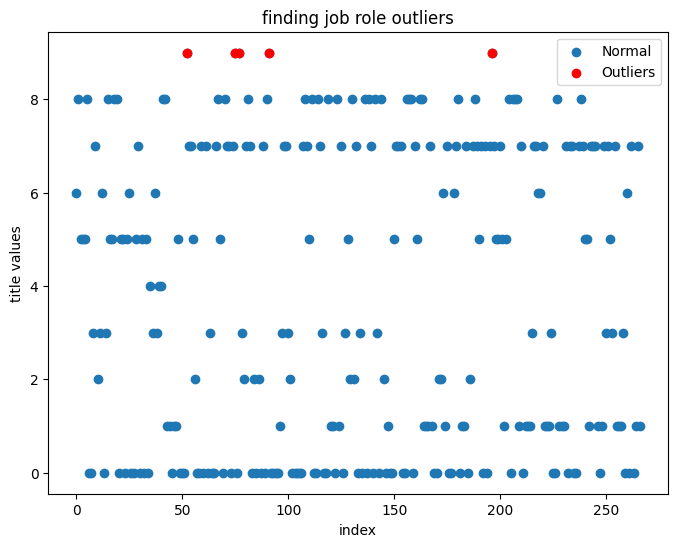

In [2071]:
import matplotlib.pyplot as plt

#AI assistance for syntax only
outliers = df[df['title_mapped'] > 8]

#ORIGINAL
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['title_mapped'], label='Normal')
plt.scatter(outliers.index, outliers['title_mapped'], color='red', label='Outliers')
plt.xlabel('index')
plt.ylabel('title values')
plt.title('finding job role outliers')
plt.legend()
plt.show()

This is a simple scatter graph that displays the mapped_title values as they are throughout the index. This visualises the outliers we have within the categories as we know any number above 8 in the categories are classed as other, and therfore, uncategorised. As we are not dealing with data that requires special cases we should remove these values to improve the accuracy.

**Stage 1 - Cleaning**

In [2072]:
#if the mapped title = 9 then print
other = df[df['title_mapped'] == 9]

print(other['title'])

52     Apprenticeships in SEO, Paid Media and Plannin...
75       Graduate Software Test Analyst, French speaking
77                                  UX and CRO Executive
91                                 Non functional Tester
196                       Content Marketing Co ordinator
Name: title, dtype: object


Now we have identified the 'other' category as the outliers we can print the index numbers of these samples to locate them. 

In [2073]:
#drop outliers
df = df.drop([52, 77, 75, 91, 196])
other = df[df['title_mapped'] == 9]
print(other['title'])

Series([], Name: title, dtype: object)


Dropping the samples now mean all roles in our dataframe are correctly categorised. Cleaned and Formatted.

In [2074]:
#check data types
df.dtypes

career_level       int64
hard_skills       object
title             object
title_category    object
title_mapped       int64
dtype: object

career_level and titles are now converted to integers, meaning the model can accurately test and train using these features. 

In [2075]:
print(df['hard_skills'])

0                                                    NaN
1                                                    NaN
2      chef, provisioning, bash, python, ruby, config...
3      chef, provisioning, bash, python, ruby, config...
4                 windows, linux, .net,dotnet,dotnetcore
                             ...                        
262                                                  NaN
263    javascript, integration, javascript|js|es6|ecm...
264                       php, bash, linux, python, ruby
265                                                  NaN
266    javascript, javascript|js|es6|ecmascript|ecmas...
Name: hard_skills, Length: 262, dtype: object


Now let's clean the hard_skills feature as we cannot recieve NaN values when training a model.

 For simplicity we will remove them, however, in version 2 we could consider filling the NaN samples with predicted data to increase the amount of samples in our dataframe.

In [2076]:
# drop all NaN samples within the feature hard_skills
df.dropna(subset=['hard_skills'], inplace=True)
print(df['hard_skills'])

2      chef, provisioning, bash, python, ruby, config...
3      chef, provisioning, bash, python, ruby, config...
4                 windows, linux, .net,dotnet,dotnetcore
6      javascript, javascript|js|es6|ecmascript|ecmas...
7      javascript, javascript|js|es6|ecmascript|ecmas...
                             ...                        
259    cucumber,cucumberbdd, watir, ranorex, soapui, ...
261    javascript, javascript|js|es6|ecmascript|ecmas...
263    javascript, integration, javascript|js|es6|ecm...
264                       php, bash, linux, python, ruby
266    javascript, javascript|js|es6|ecmascript|ecmas...
Name: hard_skills, Length: 153, dtype: object


This shows the hard_skills feature now cleaned without NaN values.

**Stage 1 - Formatting, Normalisation and Visualisation of hard_skills**

In [2077]:
#collecting the unique skills into a useable variable
unique_skills = wordlist["unique_skills"][0]["skills"]

#AI Assistance[formatting issue found, values not recognised by model]
#splitting the hard skills into lists for formatting
df['hard_skills'] = df['hard_skills'].apply(lambda x: x.split(', '))

#check
print(df["hard_skills"])


2      [chef, provisioning, bash, python, ruby, confi...
3      [chef, provisioning, bash, python, ruby, confi...
4               [windows, linux, .net,dotnet,dotnetcore]
6      [javascript, javascript|js|es6|ecmascript|ecma...
7      [javascript, javascript|js|es6|ecmascript|ecma...
                             ...                        
259    [cucumber,cucumberbdd, watir, ranorex, soapui,...
261    [javascript, javascript|js|es6|ecmascript|ecma...
263    [javascript, integration, javascript|js|es6|ec...
264                     [php, bash, linux, python, ruby]
266    [javascript, javascript|js|es6|ecmascript|ecma...
Name: hard_skills, Length: 153, dtype: object


In final stage of formatting, we extract the skills from the wordlist to use them in our code and split the samples into lists to further format the skills. 

**Note:** when trying to normalise the hard_skills feature, the model would not recognise the way the skills were presented in the dataframe. AI assistance allowed me to identify the issue and split the data into lists of strings that the model could read. To see this in context comment out the line which splits hard_skills using lambda.

In [2078]:
#binary matrix frame creation
matrix = pd.DataFrame(0, index=df.index, columns=unique_skills)


#iterating through the current row
for idx, row in df.iterrows():
    #if skill visable in row, replace 0 for 1
    for skill in row['hard_skills']:
        if skill in unique_skills:
            matrix.loc[idx, skill] = 1
        
print(matrix)

     configuration management  sql  html  aws,amazon web services  agile  \
2                           1    0     0                        0      0   
3                           1    0     0                        0      0   
4                           0    0     0                        0      0   
6                           0    0     1                        0      0   
7                           0    0     1                        0      0   
..                        ...  ...   ...                      ...    ...   
259                         0    0     0                        0      0   
261                         0    0     1                        0      0   
263                         0    0     1                        0      0   
264                         0    0     0                        0      0   
266                         0    0     1                        0      0   

     jira  css  c  sqlserver,sql server,sqldatatools  javascript  ...  gulp  \
2       

As the hard_skills feature is an extensive list with repeating values, we can not categorise the data into ordinal integers. Instead we normalise the data using a binary matrix. This code iterates through each sample in the dataframe, it then creates a column for each skill in the unique_skills list. If the skill in the string in the hard_skills feature is present then the collumn that represents that skill will show a 1, if the skill is absent, a 0 will be shown.

- 1 for True
- 0 for False

In [2079]:
#merge the binary matrix with the original
df = pd.concat([df, matrix], axis=1)
print(df)

     career_level                                        hard_skills  \
2               0  [chef, provisioning, bash, python, ruby, confi...   
3               0  [chef, provisioning, bash, python, ruby, confi...   
4               0           [windows, linux, .net,dotnet,dotnetcore]   
6               2  [javascript, javascript|js|es6|ecmascript|ecma...   
7               0  [javascript, javascript|js|es6|ecmascript|ecma...   
..            ...                                                ...   
259             0  [cucumber,cucumberbdd, watir, ranorex, soapui,...   
261             2  [javascript, javascript|js|es6|ecmascript|ecma...   
263             0  [javascript, integration, javascript|js|es6|ec...   
264             2                   [php, bash, linux, python, ruby]   
266             0  [javascript, javascript|js|es6|ecmascript|ecma...   

                                         title title_category  title_mapped  \
2                  Platform Engineer – Windows      tech

The binary matrix is now concatenated with the original dataframe.

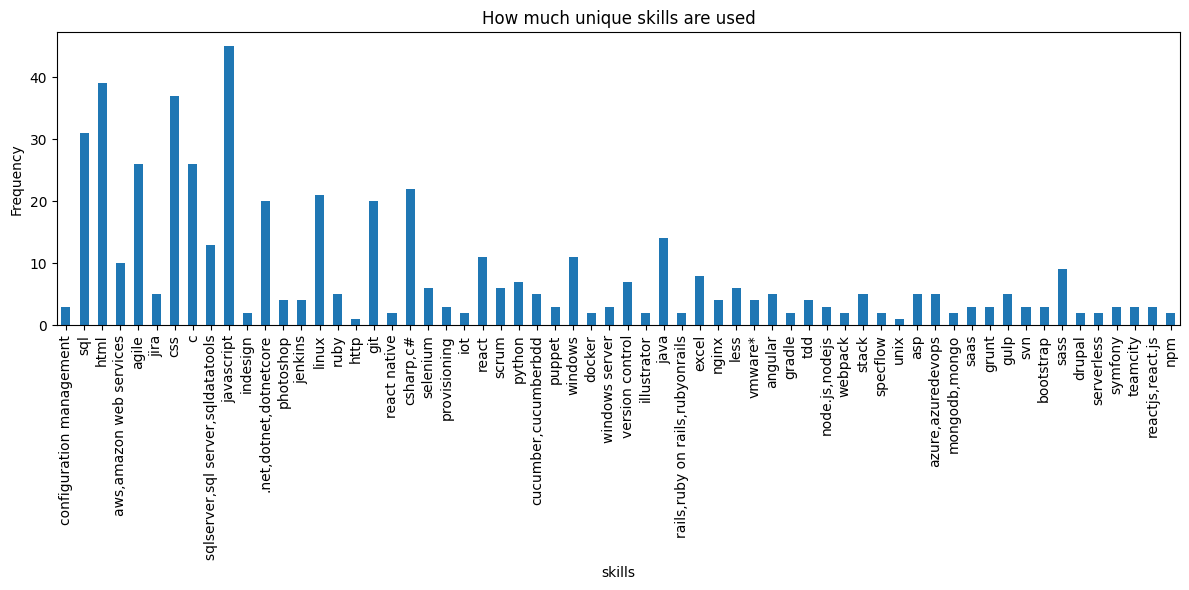

In [2080]:
#AI assistance[This code is written by the author, however, the values formatted using AI]
skill_counts = df[unique_skills].sum()
plt.figure(figsize=(12, 6))
skill_counts.plot(kind='bar')
plt.xlabel('skills')
plt.ylabel('Frequency')
plt.title('How much unique skills are used')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

Using the same logic learnt for the scatter graph. This bar graph collects the unique skills collumns in the dataframe and shows how many times there are used within the hard_skills. This gives me an idea of what collums to drop in the wordlist. Any skills that are used less than 5 times should be removed for accuracy purposes.

**Note:** Here is a list of the skills being removed: (This is only for the first version of the model. For increased variability and useability these can be added in Version 2)
Zend
Photography
couchbase
ubuntu
subversion
vb
team foundation server
cvs
jmeter
continues integration
continueous delivery
salt
kubernetes
ansible
rspec
fireworks
vcloud
optimization
unit testing
codeignite
lua
ranorex
hadoop
redis
soapui
debian
bamboo
xcode
jbehave
paas
moch
jasmine
typography
gitlab
mac
kanban
github
iaas
cocoon

**Stage - 1 Exploration**

In [2081]:
df.dtypes

career_level         int64
hard_skills         object
title               object
title_category      object
title_mapped         int64
                     ...  
serverless           int64
symfony              int64
teamcity             int64
reactjs,react.js     int64
npm                  int64
Length: 67, dtype: object

All categories have been mapped to an integer datatype now. The hard_skills in the form of a binary matrix and the title has been mapped catagorically.

In [2082]:
df.shape

(153, 67)

Shape has changed drastically. Rows have been cut down by over 100, columns increased by 65.  

In [2083]:
df.describe()

,career_level,title_mapped,configuration management,sql,html,"aws,amazon web services",agile,jira,css,c,...,gulp,svn,bootstrap,sass,drupal,serverless,symfony,teamcity,"reactjs,react.js",npm
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.555556,2.692810,0.019608,0.202614,0.254902,0.065359,0.169935,0.032680,0.241830,0.169935,...,0.032680,0.019608,0.019608,0.058824,0.013072,0.013072,0.019608,0.019608,0.019608,0.013072
std,0.965789,2.877501,0.139104,0.403268,0.437237,0.247971,0.376809,0.178381,0.429598,0.376809,...,0.178381,0.139104,0.139104,0.236067,0.113956,0.113956,0.139104,0.139104,0.139104,0.113956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The statistics shows us that we have correctly converted all columns and it now displays the mean and standard deviation for the columns giving us more information on the data. 

In [2084]:
#check remaining NaN values
df.isnull().sum()

career_level        0
hard_skills         0
title               0
title_category      0
title_mapped        0
                   ..
serverless          0
symfony             0
teamcity            0
reactjs,react.js    0
npm                 0
Length: 67, dtype: int64

0 Null Values. Missing Values have been cleaned.

In [2085]:
print(df)

     career_level                                        hard_skills  \
2               0  [chef, provisioning, bash, python, ruby, confi...   
3               0  [chef, provisioning, bash, python, ruby, confi...   
4               0           [windows, linux, .net,dotnet,dotnetcore]   
6               2  [javascript, javascript|js|es6|ecmascript|ecma...   
7               0  [javascript, javascript|js|es6|ecmascript|ecma...   
..            ...                                                ...   
259             0  [cucumber,cucumberbdd, watir, ranorex, soapui,...   
261             2  [javascript, javascript|js|es6|ecmascript|ecma...   
263             0  [javascript, integration, javascript|js|es6|ec...   
264             2                   [php, bash, linux, python, ruby]   
266             0  [javascript, javascript|js|es6|ecmascript|ecma...   

                                         title title_category  title_mapped  \
2                  Platform Engineer – Windows      tech

**Stage 1 - Cleaning and Formatting**

In [2086]:
#drop object type columns
drop_columns = ['hard_skills', 'title']
df = df.drop(columns=drop_columns)

Finishing up the formatting and cleaning by removing the columns the model can not use for training and testing.

In [2087]:
#final data type check
df.dtypes

career_level                 int64
title_category              object
title_mapped                 int64
configuration management     int64
sql                          int64
                             ...  
serverless                   int64
symfony                      int64
teamcity                     int64
reactjs,react.js             int64
npm                          int64
Length: 65, dtype: object

The title_category will be used as the target variable in Stage 2. The user will be inputting their own job category, skills, and career_level in so we keep the title_mapped as the model will be predicting categories close to the users current job area.

**Stage 1 Conclusion**

This concludes the Preprocessing stage for version 1 of the model. In the future these additions could be made to improve the bias, performance and accuracy of the model:
- Normalise title_mapped with binary matrix
- Add all hard_skills for wider results
- Add further features, such as soft skills, roles.

***END OF PREPROCESSING***

***Stage 2 - Training***

In [2088]:
#importing tools
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,  classification_report
from sklearn.metrics import confusion_matrix

This model will be trained and tested on 3 different alogrithms.
- LogisticRegression
- RandomForestClassifier
- KneighborsClassifier

We need to import these algorthms from sklearn and the evaluation metrics we will be using.

**Stage 2 - Identifying X and y**

In [2089]:
#target variable
y = df.title_category
#drop target variable from input features
X = df.drop(columns="title_category")

- y = Target Variable (what the model is predicting)
- X = Input Features (what the model is using to predict)


- y = title_category (the job field the user should transition to)
- X = title_mapped, career_level, skills_matrix.values

**Stage 2 - Splitting Training and Testing Samples**

In [2090]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

Here we are splitting our dataset into training and testing samples. The test_size is a paremeter we can set to determine how much of the dataset is tested on. o.3 means that 30%  will be used as a testing set. The random_state parameter ensures the split is reproducible, using the same random_state will give us the same split each time the code is run. This helps as we will be training and testing many times whilst developing the model.

**Stage 4 - Feature Engineering and OverSampling**

In [2091]:
#oversampling due to low data amount
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


As we have very little samples within our dataset, we should increase the samples using RandomOverSampler. This gives the model a larger amount of data to train on. 

In [2092]:
#show the title_category
print(y)

2      technical
3      technical
4      technical
6      developer
7      developer
         ...    
259    developer
261    developer
263    developer
264     engineer
266     engineer
Name: title_category, Length: 153, dtype: object


In [2093]:
#show the remaining columns used to predict
print(X)

     career_level  title_mapped  configuration management  sql  html  \
2               0             5                         1    0     0   
3               0             5                         1    0     0   
4               0             5                         0    0     0   
6               2             0                         0    0     1   
7               0             0                         0    0     1   
..            ...           ...                       ...  ...   ...   
259             0             0                         0    0     0   
261             2             0                         0    0     1   
263             0             0                         0    0     1   
264             2             1                         0    0     0   
266             0             1                         0    0     1   

     aws,amazon web services  agile  jira  css  c  ...  gulp  svn  bootstrap  \
2                          0      0     0    0  0  ... 

In [2094]:
X.shape

(153, 64)

In [2095]:
y.shape

(153,)

In [2096]:
X_train_resampled.shape

(396, 64)

In [2097]:
y_train_resampled.shape

(396,)

The resampled training sets increase the sample size by over double. 

In [2098]:
X.describe()

,career_level,title_mapped,configuration management,sql,html,"aws,amazon web services",agile,jira,css,c,...,gulp,svn,bootstrap,sass,drupal,serverless,symfony,teamcity,"reactjs,react.js",npm
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.555556,2.692810,0.019608,0.202614,0.254902,0.065359,0.169935,0.032680,0.241830,0.169935,...,0.032680,0.019608,0.019608,0.058824,0.013072,0.013072,0.019608,0.019608,0.019608,0.013072
std,0.965789,2.877501,0.139104,0.403268,0.437237,0.247971,0.376809,0.178381,0.429598,0.376809,...,0.178381,0.139104,0.139104,0.236067,0.113956,0.113956,0.139104,0.139104,0.139104,0.113956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2099]:
y_train.describe()

count           107
unique            9
top       developer
freq             44
Name: title_category, dtype: object

In [2100]:
y_train_resampled.describe()

count           396
unique            9
top       developer
freq             44
Name: title_category, dtype: object

In [2101]:
print(y_train_resampled)

0      developer
1      developer
2      developer
3       engineer
4      technical
         ...    
391       tester
392       tester
393       tester
394       tester
395       tester
Name: title_category, Length: 396, dtype: object


Here we are just exploring the resampled splits to see what are the most frequent roles. Developer is used 44 times which means there could be some biased towards choosing developer as a predicted category. This can be edited later on once more data is collected in different areas. 

**Stage 2 -Training on Different Algorithms and Stage 4 - Hyperparemeter Tuning** 

In [2102]:
#logistic regression model

#define the Hyperparameters
C = 100
penalty = 'l1'  
solver = 'liblinear'  

#uses resampled training sets for increased accuracy
clf = LogisticRegression(C=C, penalty=penalty, solver=solver)
clf.fit(X_train_resampled, y_train_resampled)
predictions = clf.predict(X_test)


c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Eventhough Logistic Regression is not the best algorithm to train this model on as the predictions are not True or False(Yes or No). It is a good start as its simple to set up and it gives us a good view on how the split samples are being used. 

We have defined the hyperparemeters here so we can start changing the values and seeing how it affects the models accuracy below. 
- C = regularisation paremeter
- penalty = type of regularisation
- solver = optimisation algorithm

**Stage 3 - Model Accuracy**

In [2103]:
#model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

Accuracy: 0.6086956521739131
              precision    recall  f1-score   support

     analyst       0.00      0.00      0.00         2
    designer       1.00      1.00      1.00         1
   developer       0.89      0.67      0.76        12
    engineer       0.67      0.55      0.60        11
  managerial       1.00      0.67      0.80        12
   marketing       0.33      1.00      0.50         1
   technical       0.50      0.67      0.57         6
  technician       0.00      0.00      0.00         1
      tester       0.00      0.00      0.00         0

    accuracy                           0.61        46
   macro avg       0.49      0.51      0.47        46
weighted avg       0.75      0.61      0.66        46



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This algorithm seems to be performing okay. Guessing the correct category just over half of the time. Looking at the accuracy score we can see classes like analyst, technician, and tester are reading back 0 as they have a low support in data. Classes like developer and managerial are working well as they have a higher amount of supporting data for the model to train on. 

The warning states that there are classes with no samples of some classes. We can see that in the Recall and F-score in certain classes as they have been set to 0.0. 

**Stage 3 - Confusion Matrix**

In [2104]:
#predict x_test
predictions = clf.predict(X_test)

#build confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[0 0 0 1 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0]
 [0 0 8 2 0 0 0 2 0]
 [0 0 1 6 0 0 2 1 1]
 [1 0 0 0 8 2 1 0 0]
 [0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 4 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]]


In a confusion matrix, the numbers in the diagonal line from the top-left to bottom-right represent positive predictions from the model. The rest of them are negative predictions, a perfect model would only have numbers displayed on the line. This model has 14 misclassifications across the various classes. 

**Stage 2 -Training on Different Algorithms and Stage 4 - Hyperparemeter Tuning** 

In [2105]:
#random forest classifier

# Define the hyperparameters
n_estimators = 150
max_depth = 25
min_samples_split = 8 

# Create the classifier with specified hyperparameters
clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,
)
#trainers
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

For the second algorithm, Random Forest Classifier is used. A robust algorithm that deals with multi-classification better. 

We have also defined the hypereparameters here:
- n_esimators = number of trees in forest(higher the number the more computational cost, 100-200 seems optimal)
- max_depth = how far a tree can go in its decisions(deeper trees can capture complex patterns in data but can lead to overfitting)
- min_samples_split = Number of samples required to split a node(too little = overfitting, too many = underfitting)

**Evaluation** After testing many different numbers in the paremeters, it seemed 80% could be achieved by keeping the numbers relatively low. The most consistent results came from the parameters set in the code.

**Stage 3 - Model Accuracy**

In [2106]:
# model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

Accuracy: 0.7608695652173914
              precision    recall  f1-score   support

     analyst       0.67      1.00      0.80         2
    designer       1.00      1.00      1.00         1
   developer       0.86      1.00      0.92        12
    engineer       1.00      0.73      0.84        11
  managerial       0.82      0.75      0.78        12
   marketing       0.25      1.00      0.40         1
   technical       0.40      0.33      0.36         6
  technician       0.00      0.00      0.00         1

    accuracy                           0.76        46
   macro avg       0.62      0.73      0.64        46
weighted avg       0.78      0.76      0.76        46



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This alogrithm performed significantly better than the LogisticRegression. An overall accuracy of 80%, 82% at peak and 76% lowest was the results I recieved. Also, specific classes like analyst and technical had a higher precision and recall even with low samples of data. This was due to how the algorithm deals with outliers and Null values. 

**Stage 2 -Training on Different Algorithms and Stage 4 - Hyperparemeter Tuning** 

In [2107]:
# k nearest kneighbours classifier

#create parameters
n_neighbors = 6
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
#trainers
knn.fit(X_train_resampled, y_train_resampled)

predictions = knn.predict(X_test)

The last algorithm I chose was the K Nearest Kneighbours Classifier. The LogisticRegression algorithm and the RandomForestClassifier both make assumptions with the data distribution affecting performance because of this. I chose this model as it is more flexible.

n_neighbors= how many neighbouring data points should the algorithm consider when making the prediction.(a higher value can lead to bias, a lower value can potentially overfit)

**Stage 3 - Model Accuracy**

In [2108]:
#model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, predictions))

Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

     analyst       1.00      1.00      1.00         2
    designer       1.00      1.00      1.00         1
   developer       0.85      0.92      0.88        12
    engineer       0.90      0.82      0.86        11
  managerial       1.00      0.83      0.91        12
   marketing       0.33      1.00      0.50         1
   technical       1.00      0.83      0.91         6
  technician       0.50      1.00      0.67         1

    accuracy                           0.87        46
   macro avg       0.82      0.93      0.84        46
weighted avg       0.91      0.87      0.88        46



At an accuracy of 86% this algorithm seems to work the best. There are no 0.0 values throughout the classes due to the flexibility of the algorithm.

***Stage 5 - Saving and Loading Model***

In [2109]:
import joblib

joblib.dump(clf, 'model.pkl')

['model.pkl']

In [2110]:
model = joblib.load('model.pkl')
print('model.pkl')

model.pkl


**Final Thoughts**

This note book has used a dataset to train, test and package a model ready for deployment at Version 1. We have used label mapping and a binary matrix to format the features and testing them on 3 different algorithms. At a peak accuracy of 86% I would call this project a success. 

However, there are issues that need to be looked at and refined in Version 2 of this model. 
- There is not enough data overall with a low number of samples.
- The different classes created do not have enough balanced samples in them to create a professional standard model.
- The titles are categorised making the predictions simple and not too helpful, as it only provides advice on a job field and not particular roles.
- The titles should instead be labelEncoded and cleaned further to increase the useability of the model.
- Extra Features, such as Soft Skills and Job Roles could be introduced.
- A deeper evaluation needs to be conducted as there are UserWarnings and Errors that could potentially affect the overall useability of the model.

Eventhough, this is only a simple use of Machine Learning. I believe that is has shown a good understanding of the different stages of development and provided a clear step-by-step guide on the process. 

**The Deployement of this model is demonstrated in app.py of this project folder**

**References**

Arora, L. (2023, May 17). How to deploy machine learning models using flask (with code!). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/04/how-to-deploy-machine-learning-model-flask/ 

Author links open overlay panelKhalid K. Al-jabery, &amp; chapter, A. this. (2019, November 22). Data Analysis and machine learning tools in MATLAB and python. Computational Learning Approaches to Data Analytics in Biomedical Applications. https://www.sciencedirect.com/science/article/abs/pii/B9780128144824000097
 
CSS Script. (2023, August 23). High performance select box javascript library - virtual select. https://www.cssscript.com/select-box-virtual-scroll/ 

Invention Tricks. (2022, May 9). JQuery multiselect Dropdown with search box | bootstrap 5 supported Multiselect Dropdown. YouTube. https://www.youtube.com/watch?v=PNyyBK6Y3KI 

Kulkarni, A. (2020). Confusion matrix. Confusion Matrix - an overview | ScienceDirect Topics. https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20represents%20the,by%20model%20as%20other%20class 

OpenAI. (n.d.). Chatgpt. ChatGPT. https://openai.com/chatgpt 

Shafi, A. (2023, February 24). Random Forest classification with Scikit-Learn. DataCamp. https://www.datacamp.com/tutorial/random-forests-classifier-python 

w3schools. (n.d.). Machine learning - confusion matrix. Python Machine Learning - Confusion Matrix. https://www.w3schools.com/python/python_ml_confusion_matrix.asp 